In [38]:
import pandas as pd
from scipy.special import logit
from seaborn import histplot, scatterplot
import numpy as np

In [39]:
mlb_player_data = pd.read_csv(
    '../Data/MLBPlayerStats/2022 MLB Player Stats - Batting.csv',
    encoding='latin1',
    sep=';'
)

In [40]:
mlb_player_data['BA']

0      0.246
1      0.232
2      0.258
3      0.000
4      0.000
       ...  
987    0.101
988    0.105
989    0.250
990    0.077
991    0.148
Name: BA, Length: 992, dtype: float64

<Axes: xlabel='BA', ylabel='Count'>

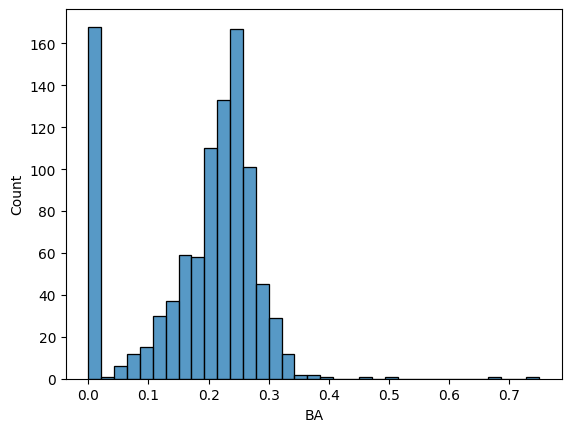

In [41]:
histplot(mlb_player_data['BA'])

<Axes: xlabel='BA', ylabel='Count'>

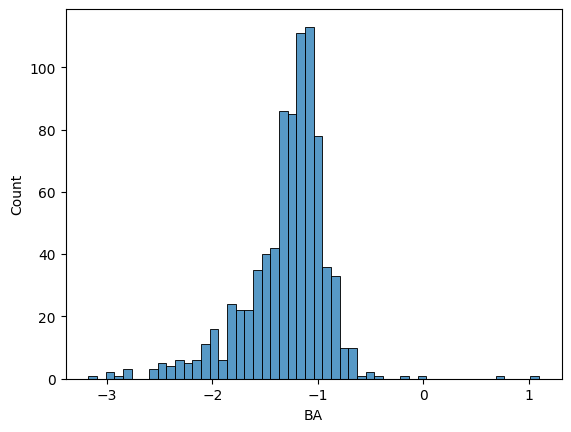

In [42]:
histplot(logit(mlb_player_data['BA']))

<Axes: ylabel='Count'>

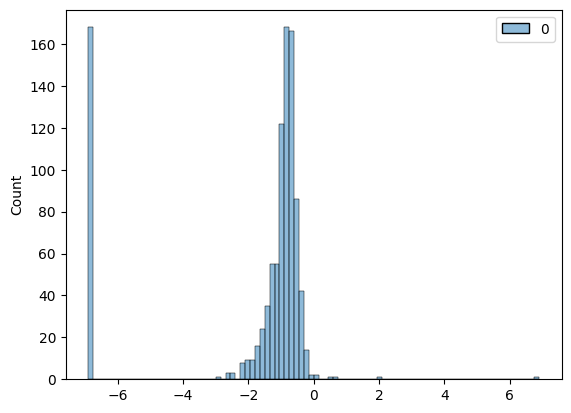

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0.001, 0.999))
scaled_BA = scaler.fit_transform(mlb_player_data[['BA']])
histplot(logit(scaled_BA))


Time Series Data

In [44]:
time_series = pd.read_csv('../Data/TXBPPRIV.csv')

In [45]:
time_series.set_index('DATE', inplace=True)

<Axes: xlabel='DATE'>

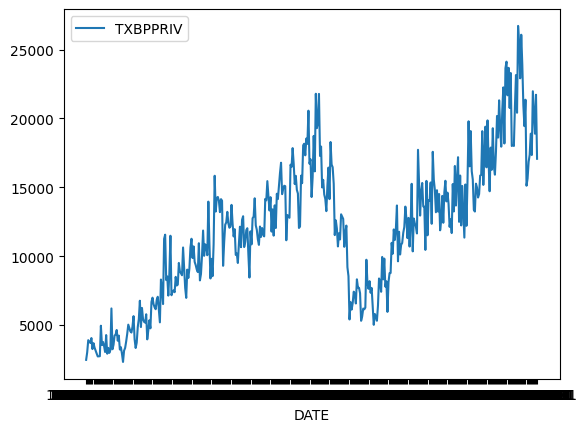

In [46]:
from seaborn import lineplot
lineplot(
    data=time_series
        )

In [47]:
time_series['rolling'] = time_series['TXBPPRIV'].rolling(5).mean()

<Axes: xlabel='DATE'>

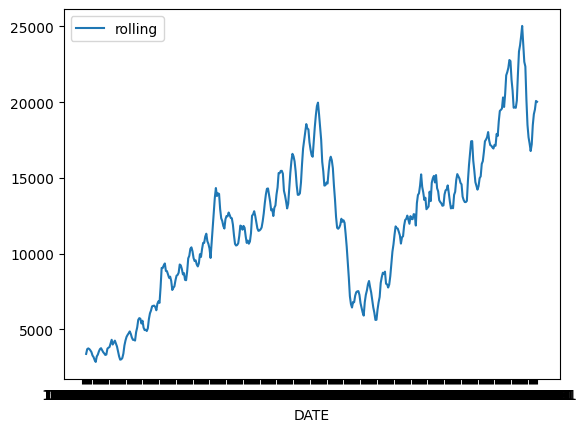

In [48]:
lineplot(
    time_series[['rolling']]
)

Potenzen

In [49]:
ames_housing_data = pd.read_csv('../Data/AmesHousing.csv')

In [50]:
ames_housing_data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [51]:
df = ames_housing_data[['Lot Area', 'SalePrice']].copy()

<Axes: ylabel='Count'>

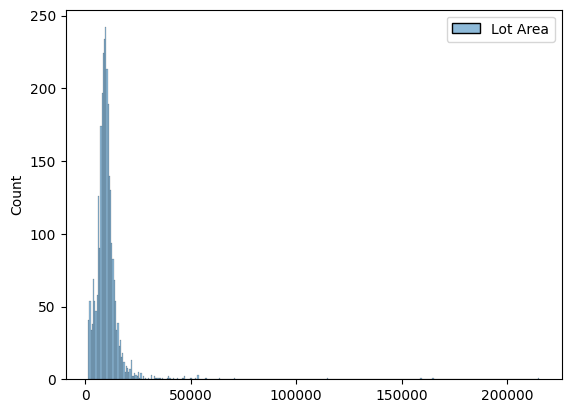

In [52]:
histplot(df[['Lot Area']])

In [53]:
df['log_lot_area'] = np.log10(df['Lot Area'])
df['log_sale_price'] = np.log10(df['SalePrice'])

<Axes: ylabel='Count'>

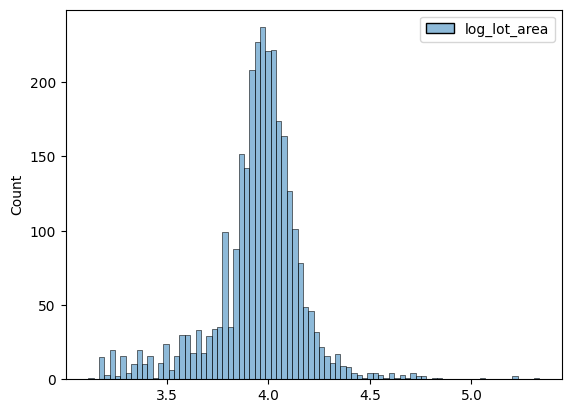

In [54]:
histplot(df[['log_lot_area']])

<Axes: xlabel='log_lot_area', ylabel='log_sale_price'>

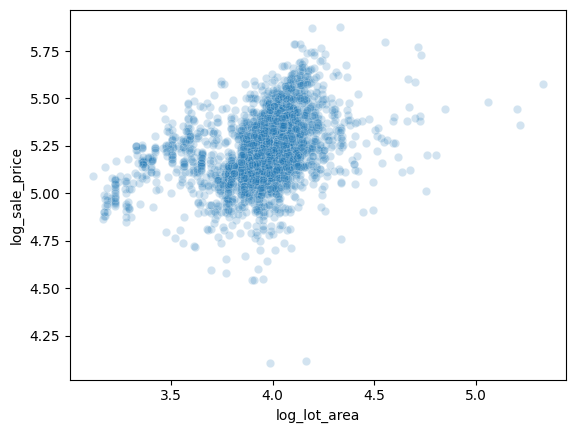

In [55]:
scatterplot(
    x = df['log_lot_area'],
    y = df['log_sale_price'],
    alpha=0.2
)

In [56]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
m = linear_model.LinearRegression()
scores = cross_val_score(m, df[['log_lot_area']], df['log_sale_price'], cv=10)
print("R-squared score: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))


R-squared score: 0.05382 (+/- 0.14568)


In [57]:
df['square_log_lot_area'] = df['log_lot_area'] * df['log_lot_area']
df['cubed_log_lot_area'] = df['square_log_lot_area'] * df['log_lot_area']

<Axes: xlabel='square_log_lot_area', ylabel='SalePrice'>

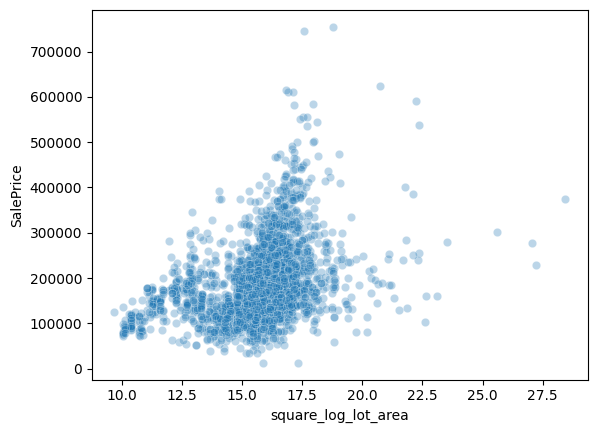

In [58]:
scatterplot(
    x = df['square_log_lot_area'],
    y = df['SalePrice'],
    alpha=0.3
)

In [59]:
m = linear_model.LinearRegression()
scores = cross_val_score(m, df[['log_lot_area', 'square_log_lot_area']], df['log_sale_price'], cv=10)
print("R-squared score: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

R-squared score: 0.05130 (+/- 0.13579)


In [60]:
m = linear_model.LinearRegression()
scores = cross_val_score(m, df[['log_lot_area', 'square_log_lot_area', 'cubed_log_lot_area']], df['log_sale_price'], cv=10)
print("R-squared score: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

R-squared score: 0.06400 (+/- 0.13624)


In [61]:
m = linear_model.LinearRegression()
scores = cross_val_score(m, df[['square_log_lot_area', 'cubed_log_lot_area']], df['log_sale_price'], cv=10)
print("R-squared score: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

R-squared score: 0.05128 (+/- 0.13680)


Hinge Function

In [62]:
df

,Lot Area,SalePrice,log_lot_area,log_sale_price,square_log_lot_area,cubed_log_lot_area
0,31770,215000,4.502017,5.332438,20.268159,91.247601
1,11622,105000,4.065281,5.021189,16.526509,67.184899
2,14267,172000,4.154333,5.235528,17.258480,71.697467
3,11160,244000,4.047664,5.387390,16.383585,66.315252
4,13830,189900,4.140822,5.278525,17.146408,71.000228
...,...,...,...,...,...,...
2925,7937,142500,3.899656,5.153815,15.207320,59.303322
2926,8885,131000,3.948657,5.117271,15.591896,61.567054
2927,10441,132000,4.018742,5.120574,16.150288,64.903842
2928,10010,170000,4.000434,5.230449,16.003473,64.020838


In [63]:
df['hinge_0'] = df.log_lot_area.apply(lambda x: max(3.75 - x, 0))
df['hinge_1'] = df.log_lot_area.apply(lambda x: max(x - 3.75, 0))
df['hinge_2'] = df.log_lot_area.apply(lambda x: max(4.25 - x, 0))
df['hinge_3'] = df.log_lot_area.apply(lambda x: max(x - 4.25, 0))

<Axes: xlabel='log_lot_area', ylabel='hinge_3'>

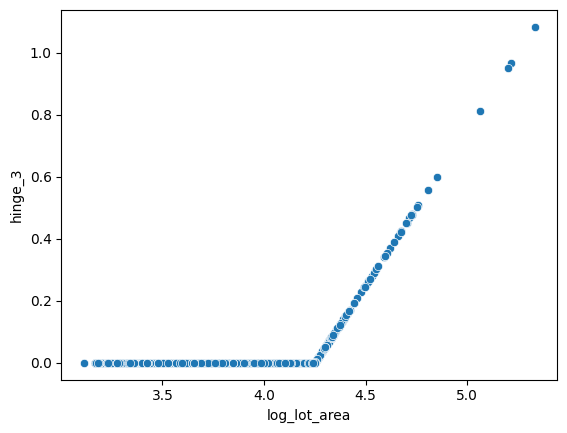

In [64]:
scatterplot(
    x=df['log_lot_area'],
    y=df['hinge_3']
)

In [65]:
m = linear_model.LinearRegression()
scores = cross_val_score(m, df[['hinge_0', 'hinge_1', 'hinge_2', 'hinge_3']], df['log_sale_price'], cv=10)
print("R-squared score: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

R-squared score: 0.09874 (+/- 0.12193)


Interaction variables

In [68]:
interaction_df = ames_housing_data[
    [
        'Central Air',
        'Year Built',
        'SalePrice'
    ]
].copy()
interaction_df['air_cond'] = interaction_df['Central Air'].apply(lambda x: 1 if x=='Y' else 0)
interaction_df['log_sale_price'] = np.log10(ames_housing_data['SalePrice'])

<Axes: xlabel='Year Built', ylabel='log_sale_price'>

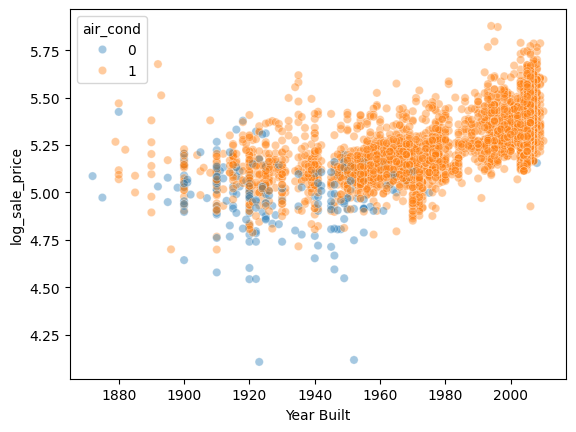

In [69]:
scatterplot(
    x = interaction_df['Year Built'],
    y = interaction_df['log_sale_price'],
    hue = interaction_df['air_cond'],
    alpha=0.4
)

In [70]:
interaction_df['year_built_x_air_cond'] = interaction_df['air_cond'] * interaction_df['Year Built']

In [71]:
m_with_interaction = linear_model.LinearRegression()
m_with_interaction.fit(
    X=interaction_df[[
        'Year Built',
        'air_cond',
        'year_built_x_air_cond'
    ]],
    y=interaction_df['log_sale_price']
)


LinearRegression()

In [72]:
m_no_interaction = linear_model.LinearRegression()
m_no_interaction.fit(
    X=interaction_df[[
        'Year Built',
        'air_cond',
    ]],
    y=interaction_df['log_sale_price']
)


LinearRegression()

In [73]:
pred_with_interaction = m_with_interaction.predict(
    interaction_df[[
        'Year Built',
        'air_cond',
        'year_built_x_air_cond'
    ]]
)
pred_no_interaction = m_no_interaction.predict(
    interaction_df[[
        'Year Built',
        'air_cond'
    ]]
)

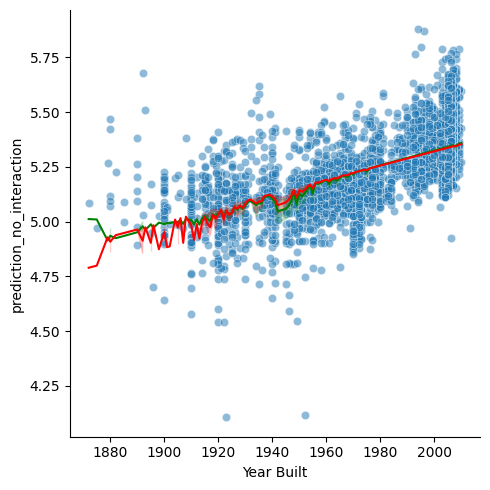

In [74]:
from seaborn import relplot
interaction_df['prediction_with_interaction'] = pred_with_interaction
interaction_df['prediction_no_interaction'] = pred_no_interaction
ax = relplot(
    kind='scatter',
    data=interaction_df,
    x='Year Built',
    y='log_sale_price',
    alpha=0.5
)
ax.map_dataframe(
    lineplot,
    'Year Built',
    'prediction_with_interaction',
    color='g'
)
ax.map_dataframe(
    lineplot,
    'Year Built',
    'prediction_no_interaction',
    color='r'
)

In [75]:
scores_interaction = cross_val_score(
    m_with_interaction,
    interaction_df[[
        'Year Built',
        'air_cond',
        'year_built_x_air_cond'
    ]],
    interaction_df['log_sale_price'],
    cv=10
)
scores_interaction.mean(), scores_interaction.std()

(0.3702194357403463, 0.06633351814853149)

In [76]:
scores_no_interaction = cross_val_score(
    m_no_interaction,
    interaction_df[[
        'Year Built',
        'air_cond'
    ]],
    interaction_df['log_sale_price'],
    cv=10
)
scores_no_interaction.mean(), scores_no_interaction.std()

(0.3544110228237337, 0.06339804070300728)

Second example interaction

In [79]:
news_df = pd.read_csv("../Data/OnlineNewsPopularity/OnlineNewsPopularity.csv")
features = [
    "n_tokens_title",
    "n_tokens_content",
    "n_unique_tokens",
    "n_non_stop_words",
    "n_non_stop_unique_tokens",
    "num_hrefs",
    "num_self_hrefs",
    "num_imgs",
    "num_videos",
    "average_token_length",
    "num_keywords",
    "data_channel_is_lifestyle",
    "data_channel_is_entertainment",
    "data_channel_is_bus",
    "data_channel_is_socmed",
    "data_channel_is_tech",
    "data_channel_is_world",
]

In [80]:
columns = news_df.columns.to_list()
news_df.columns = [column.strip() for column in columns]

In [81]:
from sklearn.preprocessing import PolynomialFeatures
X = news_df[features].copy()
X2 = PolynomialFeatures(include_bias=False).fit_transform(X)

In [235]:
from sklearn.model_selection import train_test_split

y = news_df[["shares"]]
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(
    X, X2, y, test_size=0.3, random_state=123
)

In [236]:
def evaluate_feature(X_train, X_test, y_train, y_test):
    """Fit a linear regression model on the training set and
    score on the test set"""
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

In [237]:
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)
print("R-squared score with pairwise features: %0.10f" % r2)

R-squared score with singleton features: 0.00924
R-squared score with pairwise features: 0.0113259521


Binning

In [82]:
import json
import pandas as pd
data_file = open('../Data/yelp/yelp_academic_dataset_business.json')
data = []
for line in data_file:
    data.append(json.loads(line))
review_df = pd.DataFrame(data)

In [87]:
# review_df.review_count.qcut()
pd.qcut(
    review_df.review_count,
    4,
    labels=False,
    retbins=True
)

(0         0
 1         1
 2         2
 3         3
 4         1
          ..
 150341    1
 150342    0
 150343    0
 150344    2
 150345    1
 Name: review_count, Length: 150346, dtype: int64,
 array([5.000e+00, 8.000e+00, 1.500e+01, 3.700e+01, 7.568e+03]))